In [1]:
# Exploratory Data Analysis
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

In [2]:
# Load the ratings-sales data
df_sales=pd.read_csv("video_rating.csv")
df_sales.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [3]:
# data dimension 
df_sales.shape

(5330, 15)

In [4]:
#Different data types
df_sales.dtypes

Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [5]:
df_sales.head(10)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
1,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN
2,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN
3,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
4,X360,2008,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T
5,PS3,2008,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T
6,Wii,2008,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T
7,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43,NaN,NaN,NaN,NaN,NaN,NaN
8,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.13,65.0,10.0,tbd,NaN,Vicarious Visions,T
9,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T


In [6]:
#missing values 
df_sales.isnull().sum()

Platform              0
Year_of_Release       0
Genre                 0
Publisher            25
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       2088
Critic_Count       2088
User_Score         1547
User_Count         2417
Developer          1534
Rating             1547
dtype: int64

In [7]:
# relevant continuous variables
df_sales_cont=df_sales.drop(columns=['Platform','Year_of_Release','Genre','Publisher','User_Score','Developer','Rating'])

In [8]:
# statistical summary for continuous variables
from pandas import set_option
set_option('display.width',120)
set_option('precision',3)
df_sales_cont.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,5330.000,5330.000,5330.000,5330.000,5330.000,3242.000,3242.000,2913.000
mean,0.252,0.125,0.054,0.055,0.486,67.428,26.658,87.484
std,0.633,0.470,0.266,0.246,1.381,13.744,17.396,377.747
min,0.000,0.000,0.000,0.000,0.010,19.000,4.000,4.000
25%,0.020,0.000,0.000,0.000,0.060,59.000,12.000,9.000
50%,0.090,0.010,0.000,0.010,0.160,69.000,24.000,18.000
75%,0.260,0.070,0.020,0.030,0.450,78.000,37.000,44.000
max,15.680,12.760,6.500,10.570,35.520,98.000,95.000,9851.000


In [9]:
# Platform distribution 
cat_platform=df_sales.groupby('Platform').size()
print(cat_platform)

Platform
DC         2
DS      1210
GBA      355
GC       224
PC       257
PS2     1183
PS3      255
PSP      532
Wii      510
X360     380
XB       422
dtype: int64


In [10]:
# Genre distribution 
cat_genre=df_sales.groupby('Genre').size()
print(cat_genre)

Genre
Action          932
Adventure       400
Fighting        243
Misc            671
Platform        307
Puzzle          231
Racing          388
Role-Playing    456
Shooter         421
Simulation      331
Sports          730
Strategy        220
dtype: int64


In [11]:
# Publisher distribution 
cat_publisher=df_sales.groupby('Publisher').size()
print(cat_publisher)

Publisher
10TACLE Studios            3
2D Boy                     1
505 Games                 85
5pb                        5
AQ Interactive             2
                          ..
Zoo Digital Publishing    78
Zoo Games                  8
Zushi Games                5
fonfun                     1
responDESIGN               2
Length: 253, dtype: int64


In [12]:
# Developers distribution 
cat_dev=df_sales.groupby('Developer').size()
print(cat_dev)

Developer
10tacle Studios, Fusionsphere Systems    2
1C, Various, 1C Company                  1
1C: Maddox Games                         1
1st Playable Productions                 6
2015                                     1
                                        ..
odenis studio                            1
oeFun                                    1
puzzle.tv                                1
syn Sophia                               1
zSlide                                   1
Length: 925, dtype: int64


In [13]:
# Ratings distribution 
cat_rating=df_sales.groupby('Rating').size()
print(cat_rating)

Rating
AO         1
E       1568
E10+     592
EC         2
M        495
T       1125
dtype: int64


In [14]:
# average sales by platforms
cat_avg_platform=df_sales.groupby(['Platform']).mean()['Global_Sales']
print(cat_avg_platform)

Platform
DC      0.030
DS      0.463
GBA     0.340
GC      0.305
PC      0.154
PS2     0.512
PS3     0.834
PSP     0.353
Wii     0.743
X360    0.765
XB      0.298
Name: Global_Sales, dtype: float64


In [15]:
# average sales by Genre
cat_avg_genre=df_sales.groupby(['Genre']).mean()['Global_Sales']
print(cat_avg_genre)

Genre
Action          0.502
Adventure       0.193
Fighting        0.459
Misc            0.502
Platform        0.620
Puzzle          0.340
Racing          0.636
Role-Playing    0.531
Shooter         0.610
Simulation      0.531
Sports          0.505
Strategy        0.170
Name: Global_Sales, dtype: float64


In [16]:
# average sales by Genre
cat_avg_pub=df_sales.groupby(['Publisher']).mean()['Global_Sales']
print(cat_avg_pub)

Publisher
10TACLE Studios           0.037
2D Boy                    0.040
505 Games                 0.266
5pb                       0.020
AQ Interactive            0.190
                          ...  
Zoo Digital Publishing    0.116
Zoo Games                 0.116
Zushi Games               0.120
fonfun                    0.020
responDESIGN              0.065
Name: Global_Sales, Length: 253, dtype: float64


In [17]:
# convert year to date
df_sales['Year_of_Release']=df_sales['Year_of_Release'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y'))

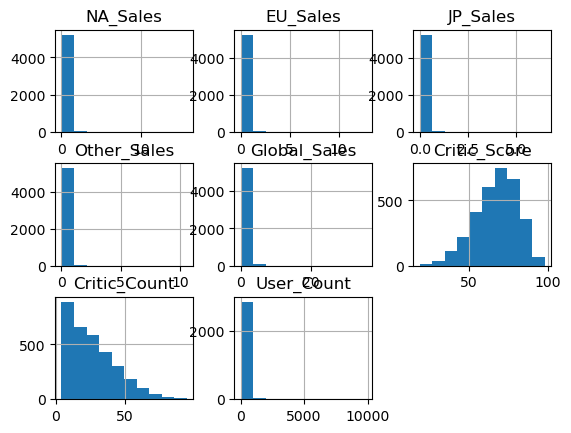

In [18]:
# A histogram of the Global sales and other sales
%matplotlib inline
import matplotlib.pyplot as plt
df_sales_cont.hist()
plt.show()

In [19]:
# transform Global scale on the natural log 
import numpy as np
df_sales['Log_Global']=np.log(df_sales['Global_Sales'])
df_sales.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global
0,PS2,2006-01-01,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,-1.772
1,PS2,2006-01-01,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN,-1.470
2,PS2,2006-01-01,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN,-1.833
3,PS2,2007-01-01,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,-1.772
4,X360,2008-01-01,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,0.392


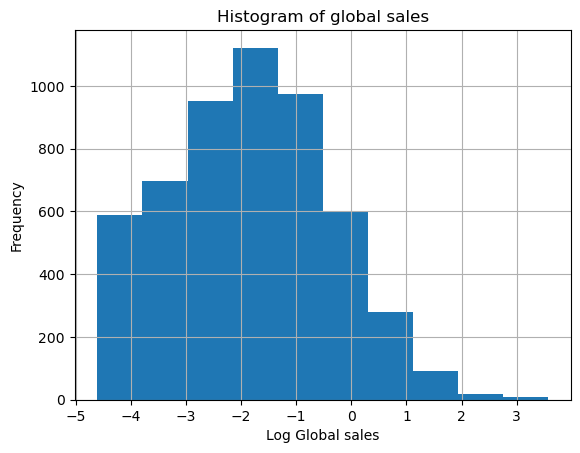

In [20]:
# A histogram of log Global sales
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
df_sales.Log_Global.hist()
pl.title("Histogram of global sales")
pl.xlabel("Log Global sales")
pl.ylabel("Frequency")
plt.show()


Log_Global         AxesSubplot(0.125,0.11;0.227941x0.77)
Critic_Score    AxesSubplot(0.398529,0.11;0.227941x0.77)
Critic_Count    AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

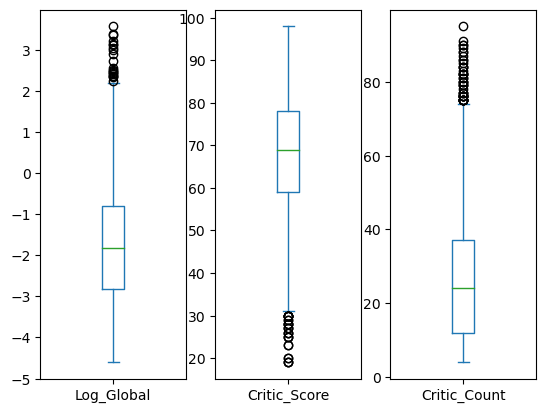

In [21]:
import matplotlib.pyplot as plt
df_sales_conts=df_sales[['Log_Global', 'Critic_Score', 'Critic_Count']]
df_sales_conts.plot(kind='box',subplots=True,layout=(1,3),sharex=False, sharey=False)

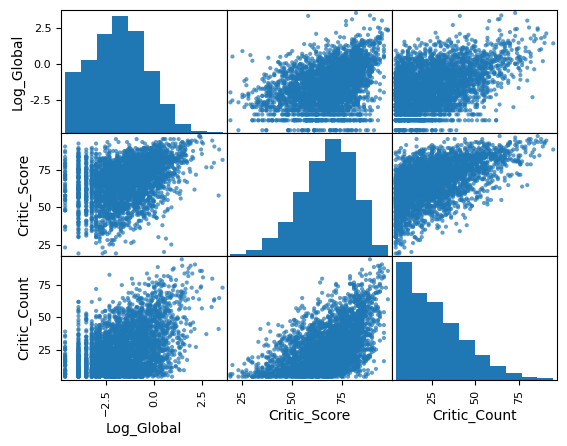

In [22]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
df_sales_conts=df_sales[['Log_Global', 'Critic_Score', 'Critic_Count']]
scatter_matrix(df_sales_conts,alpha=0.7)
pyplot.show()

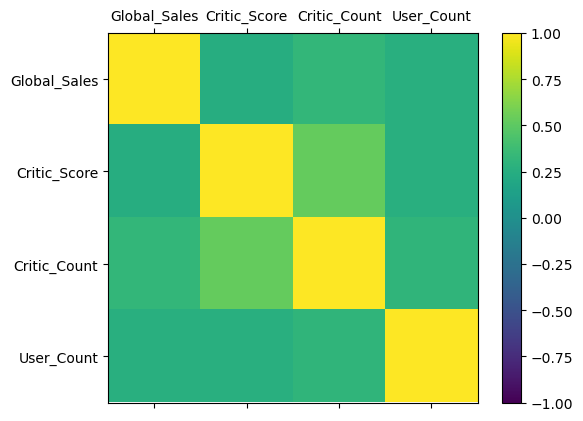

In [24]:
# correlation matrix
import numpy
names=['Global_Sales', 'Critic_Score', 'Critic_Count','User_Count']
df_sales_conts=df_sales[['Global_Sales', 'Critic_Score', 'Critic_Count','User_Count']]
correlations=df_sales_conts.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [25]:
# plot the dummy
df_sales_year=df_sales.groupby('Year_of_Release').mean()['Global_Sales']
df_sales_year

Year_of_Release
2004-01-01    0.550
2005-01-01    0.488
2006-01-01    0.434
2007-01-01    0.506
2008-01-01    0.471
Name: Global_Sales, dtype: float64

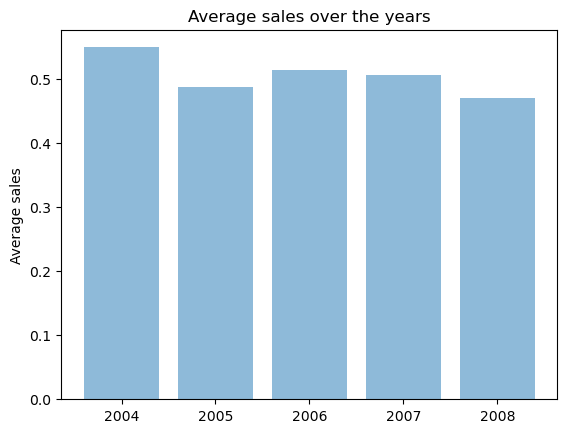

In [26]:
# Barplot of average sales over the year of release
import matplotlib.pyplot as plt; plt.rcdefaults()
objects=('2004','2005','2006','2007','2008')
avg_sales=[0.550,0.488,0.515,0.506,0.471]
y_pos=np.arange(len(objects))
plt.bar(y_pos,avg_sales,align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Average sales")
plt.title("Average sales over the years")
plt.show()

In [27]:
# Machine Learning 
arr=df_sales_conts.values
df_sales[['Log_Global', 'Critic_Score',]].values

array([[-1.77195684,         nan],
       [-1.46967597,         nan],
       [-1.83258146,         nan],
       ...,
       [-3.5065579 ,         nan],
       [-2.20727491, 75.        ],
       [-3.91202301,         nan]])

In [28]:
# Drop the null rows
df_sales = df_sales.dropna()
df_sales.head(5)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global
4,X360,2008-01-01,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,0.392
5,PS3,2008-01-01,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T,0.131
6,Wii,2008-01-01,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T,-0.431
9,PC,2008-01-01,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T,-3.507
10,DS,2008-01-01,Misc,DSI Games,0.08,0.00,0.00,0.01,0.08,38.0,5.0,3.2,5.0,ECI,E,-2.526


In [29]:
df_sales=df_sales.drop(
    columns=['Year_of_Release','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count','User_Score','User_Count','Developer'])
df_sales.head()

,Platform,Genre,Global_Sales,Critic_Score,Rating,Log_Global
4,X360,Action,1.48,65.0,T,0.392
5,PS3,Action,1.14,65.0,T,0.131
6,Wii,Action,0.65,54.0,T,-0.431
9,PC,Action,0.03,70.0,T,-3.507
10,DS,Misc,0.08,38.0,E,-2.526


In [30]:
# Generate categorical variable list
df_cat=df_sales.dtypes[df_sales.dtypes=="object"].index.tolist()

In [31]:
# check the number of unique values in each categorical column 
df_sales[df_cat].nunique()

Platform    10
Genre       12
Rating       5
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [33]:
enc=OneHotEncoder(sparse=False)

#Fit the encoder and produce encoded DataFrame
encode_df=pd.DataFrame(enc.fit_transform(df_sales[df_cat]))
#rename encoded columns 
encode_df.columns=enc.get_feature_names(df_cat)
encode_df.head()

C:\Users\elnar\anaconda3\envs\MLang\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS2,Platform_PS3,Platform_PSP,Platform_Wii,Platform_X360,Platform_XB,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# Merge one-hot encoded features
df_sale=df_sales.merge(encode_df,left_index=True,right_index=True)
df_sale=df_sale.drop(df_cat,1)
df_sale.head()

C:\Users\elnar\anaconda3\envs\MLang\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Global_Sales,Critic_Score,Log_Global,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS2,Platform_PS3,Platform_PSP,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
4,1.48,65.0,0.392,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.14,65.0,0.131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.65,54.0,-0.431,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.03,70.0,-3.507,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.08,38.0,-2.526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Split the preprocessed data into our features and target arrays
y=df_sale["Log_Global"].values
X=df_sale.drop(["Log_Global"],1).values

# Split the preprocessed data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=55)

C:\Users\elnar\anaconda3\envs\MLang\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# Create a StandardScaler instance
scaler=StandardScaler()

# Fit the StandardScaler
X_scaler=scaler.fit(X_train)

#scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)